# Import Required Laibrareis

In [17]:
#import laibraries for data handling
import pandas as pd 
import numpy as np

#import laibraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#import ml tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset

In [22]:
# Load the loan prediction dataset
df = pd.read_csv("E:\internship datasets\loan prediction (2).csv")

In [24]:
#Dispaly 5 rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Explanation:
This step loads the dataset and shows the first few rows to understand the structure.

# Dataset Information

In [25]:
#check dataset information including missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Handle Missing Values

In [26]:
# Fill missing categorical values with the most frequent value (mode)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill missing numerical values with the mean (average)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)


### Explanation:
Missing data is handled so that the model can train properly without errors.

# Exploratory Data Analysis (EDA)

### Loan Amount Distribution

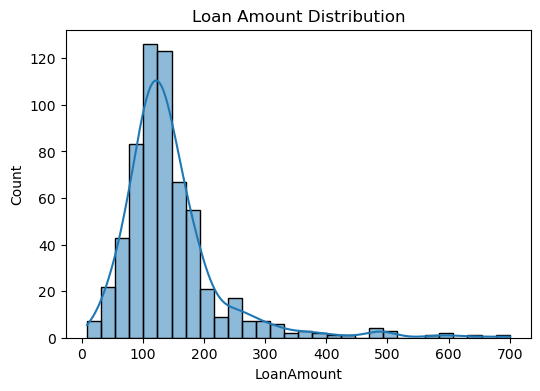

In [28]:
# Plot distribution of loan amounts
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()


### Explanation:
This graph shows how loan amounts are distributed among applicants.

### Education vs Loan Status

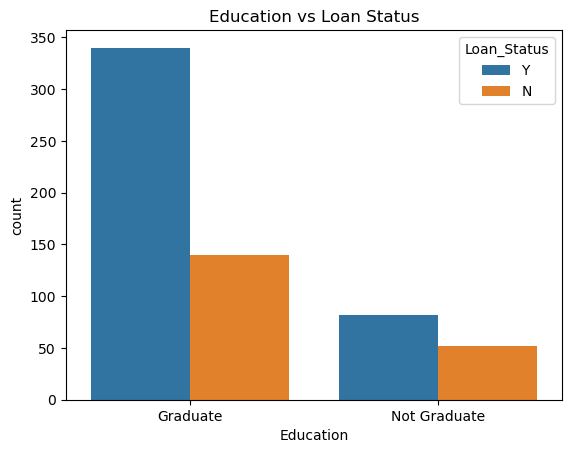

In [29]:
# Count plot to compare education level with loan approval status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()


### Explanation:
This visualization shows whether graduates or non-graduates get more loans approved.

## Applicant Income vs Loan Status

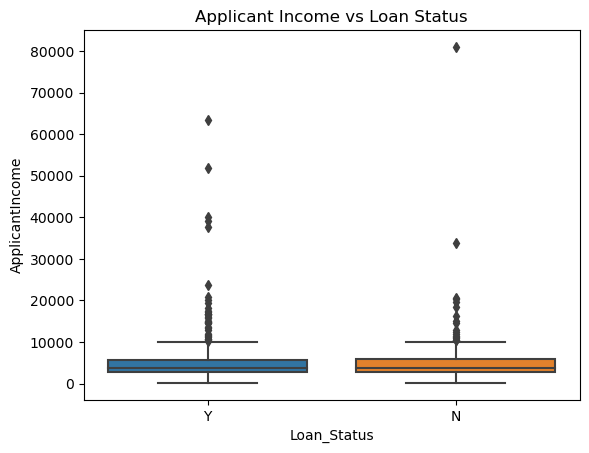

In [30]:
# Box plot to compare applicant income with loan approval status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income vs Loan Status")
plt.show()


### Explanation:
This helps understand the relationship between income and loan approval.

# Encode Categorical Variables

In [32]:
# Convert categorical variables into numeric form
le = LabelEncoder()

# Apply label encoding to all object type columns
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


### Explanation:
Machine learning models only understand numbers, so text data is converted into numeric values.

# Feature Selection

In [34]:
# Separate input features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


### Explanation:
Loan_Status is the target variable, while other columns are used as input features.

# Train-Test Split

In [35]:
# Split the dataset into training and testing sets
# 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Explanation:
This ensures the model is tested on unseen data.

# Logistic Regression Model

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [49]:
# Create scaler object
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)


In [50]:
# Initialize Logistic Regression with higher iterations
lr = LogisticRegression(max_iter=2000)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict loan status on test data
y_pred_lr = lr.predict(X_test_scaled)


### Explanation:
Logistic Regression is used for binary classification problems.

## Evaluate Logistic Regression

In [51]:
# Calculate accuracy of the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Create confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

accuracy_lr, conf_matrix_lr


(0.7886178861788617,
 array([[18, 25],
        [ 1, 79]], dtype=int64))

### Explanation:
Accuracy shows overall performance, and the confusion matrix shows correct and incorrect predictions.

# Decision Tree Model

In [40]:
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Predict loan status using Decision Tree
y_pred_dt = dt.predict(X_test)


### Explanation:
Decision Tree makes decisions based on conditions and rules.

# Evaluate Decision Tree

In [41]:
# Calculate accuracy of Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Create confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt, conf_matrix_dt


(0.6991869918699187,
 array([[23, 20],
        [17, 63]], dtype=int64))

### Explanation:
This helps compare Decision Tree performance with Logistic Regression.

# Final Conclusion

- Missing values were handled properly
- Important features were visualized
- Two classification models were trained
- Models were evaluated using accuracy and confusion matrix
